La Página que elegí es la siguiente: https://steamcommunity.com/app/2448970/reviews/?browsefilter=toprated&snr=1_5_100010_&filterLanguage=latam

Elegí esta página debido a que me parecio muy interesante y divertido poder analizar los comentarios sobre un juego que me gustó
tanto pero que a medida que paso el tiempo la gente fue odiando poco a poco, por lo que me gustaría ver desde cuando empezó a disgustarle a la gente
y ver que tantas horas jugaron aquellas personas, se podrán hacer buenos analisis para uso personal

In [11]:
import os
import selenium.webdriver as webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options
import time
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv


#Esta parte del codigo se encarga de generar el agente de selenium para poder acceder a la pagina por medio del navegador Edge
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:97.0) Gecko/20100101 Firefox/97.0'
edge_driver_path = os.path.join(os.getcwd(), 'msedgedriver.exe')
edge_service = Service(edge_driver_path)
edge_options = Options()
edge_options.add_argument(f'user-agent={user_agent}')

browser = webdriver.Edge(service=edge_service, options=edge_options)

browser.get("https://steamcommunity.com/app/2448970/reviews/?browsefilter=toprated&snr=1_5_100010_&filterLanguage=latam")
time.sleep(5)


#El agente de selenium llamado browser encuentra el body de la pagina htlm para poder empezar a actuar sobre ella
body = browser.find_element("tag name", "body")


#browser hara scrolls para poder acceder a toda la información de la pagina

ultima_altura = browser.execute_script("return document.body.scrollHeight")
while True:
    body.send_keys(Keys.END)
    time.sleep(2)

    nueva_altura = browser.execute_script("return document.body.scrollHeight")
    #Se llegara al final cuando despues de hacer scroll no se pueda bajar mas, osea nueva altura = ultima altura
    if nueva_altura == ultima_altura:
        break
    ultima_altura = nueva_altura


#Ahora se empieza a acceder a la pagina que está estatica mediante
#Para luego empezar a usar la libreria de BeautifulSoup para empezar a buscar los datos en la pagina que ahora es estática

page_source = browser.page_source
soup = BeautifulSoup(page_source, "html.parser")

#A continuación buscaremos el contenedor donde estan las reseñas para obtener información de las mismas
reseña = soup.find_all("div", class_="apphub_UserReviewCardContent")


#Iteraremos sobre el contenedor de reseñas para poder obtener los datos que posee, los cuales son:
#-Reseña Util
#-Reseña Divertida
#-Recomendacion (Si o No)
#-Horas Jugadas al momento de hacer la reseña
#-Fecha de Reseña
#-Reseña (texto)

with open("reseñas.csv", mode="w", newline="", encoding="utf-8") as archivo:
    encabezados = ["Calificación util", "Calificación divertido", "Recomendacion", "Horas jugadas", "Fecha de Reseña", "Reseña"]

    writer = csv.DictWriter(archivo, fieldnames=encabezados)
    writer.writeheader()

    #Se itera por cada contenedor de reseñas, es decir por cada reseña
    for reseñas in reseña:
        #En el HTML donde class ="apphub_UserReviewCardContent" podemos obtener separando por | la reseña util de la divertida
        textos = reseñas.get_text(separator = "|").split("|")
        if len(textos)> 1:
            util = textos[1].strip()
            divertida = textos[2].strip()
        elif len(textos) == 1:
            util = textos[1].strip()
            divertida = ""
        else:
            util = divertida = ""



        #Obtenemos la recomendación y las horas jugadas de la reseña
        vote_header = reseñas.find("div", class_="vote_header")
        Recomendacion = reseñas.find("div", class_="title").get_text()
        Horas_Jugadas = reseñas.find("div", class_="hours").get_text()

        #Accedemos al contenedor donde esta el texto de la reseña y obtenemos la fecha de la reseña
        CardTextContent = reseñas.find("div", class_="apphub_CardTextContent")
        text_content = reseñas.find("div", class_="date_posted").get_text()
        #Inicialisamos una lista donde esta todo el texto de la reseña
        elementos = list(CardTextContent.children)
        texto_reseña = ""
        empezar = False
        #Concatenamos todo el texto que haya en el contenedor de la reseña ya que el texto contiene saltos de linea
        for elem in elementos:
            if elem.name =="br":
                empezar = True
                continue
            if empezar:
                if isinstance(elem,str):
                    texto_reseña += elem.strip() + "\n"
                    
        texto_reseña = texto_reseña.strip()
        print(text_content)
        print(texto_reseña)

        #Escribimos en el archivo por cada fila los datos obtenidos de cada contenedor de reseñas
        writer.writerow({
            
            "Calificación util": util,
            "Calificación divertido": divertida,
            "Recomendacion": Recomendacion,
            "Horas jugadas": Horas_Jugadas,
            "Fecha de Reseña": text_content,
            "Reseña": texto_reseña,
            })
        
#Cerramos selenium
browser.quit()

Publicada el 18 de julio de 2024
Cuando hablamos de este juego es inevitable hablar de Dark and Darker y después de haber jugado los 2 puedo decir que este juego si te da la experiencia completa siendo Free2Play y a la vez tiene una jugabilidad mucho mas fluida y a la vez mejores gráficos/estilo artístico...
La mayoría de los que reseñen este juego negativamente son Fans de Dark and Darker acusando a este juego de copia o gente que compro en su momento el Dark and Darker y se siente est*pid* de haber pagado y ver que la gente elija este juego... asique si estas pensando en darle una oportunidad a este juego y lees esto entra y probalo que es F2P y saca tus propias conclusiones.
Publicada el 6 de septiembre de 2024
grandioso ♥♥♥♥♥♥♥ haciendo equipos para matar solo latinos, equipo de 9 ♥♥♥♥♥♥♥ para matar a uno de 3 solo latinos.
todas las salas pasa lo mismo, equipos de ♥♥♥♥♥♥♥ cazando a latinos. ya es mi octava de 10 partida que pasa lo mismo. gg game
no recomiendo el juego ya, simplem

In [12]:
import pandas as pd
import re
from datetime import timedelta, datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Leer el CSV
df = pd.read_csv("reseñas.csv", sep=",", quotechar='"', engine="python")
df.head()

,Calificación util,Calificación divertido,Recomendacion,Horas jugadas,Fecha de Reseña,Reseña
0,A 48 personas les pareció útil esta reseña,2 personas encontraron divertida esta reseña,Recomendado,7.7 h registradas,Publicada el 18 de julio de 2024,Cuando hablamos de este juego es inevitable ha...
1,A 7 personas les pareció útil esta reseña,0,No recomendado,363.3 h registradas,Publicada el 6 de septiembre de 2024,grandioso ♥♥♥♥♥♥♥ haciendo equipos para matar ...
2,A 24 personas les pareció útil esta reseña,2 personas encontraron divertida esta reseña,Recomendado,2.4 h registradas,Publicada el 18 de julio de 2024,NaN
3,A 79 personas les pareció útil esta reseña,12 personas encontraron divertida esta reseña,No recomendado,0.6 h registradas,Publicada el 18 de julio de 2024,high ping for latin america
4,A 10 personas les pareció útil esta reseña,0,No recomendado,23.6 h registradas,Publicada el 11 de septiembre de 2024,Publico esta review negativa en forma de prote...


In [13]:
#Verificamos cuantos valores nulos hay en el dataset
df.dtypes

Calificación util         object
Calificación divertido    object
Recomendacion             object
Horas jugadas             object
Fecha de Reseña           object
Reseña                    object
dtype: object

Ahora nos encargaremos de limpiar las columnas y de organizarlas debido a que como podemos ver todas las columnas estan en tipos de datos que no queremos.

In [14]:
#Esta función por medio de una expresión regular, se encarga de obtener la hora debido a que originalmente esta en
#el siguiente formato: 7.7 h registradas
def limpiar_horas(h):
    if pd.isna(h):
        return timedelta(0)

    #Expresión regular que se encarga de buscar cualquier secuencia de uno o más digitos, puntos o comas en una cadena
    match = re.search(r"[\d.,]+", str(h))
    if match:
        valor = match.group()

        #Se cuenta la cantidad de puntos (separación de 7.7 horas)
        if valor.count('.') > 1:
            #si se tiene mas de 1 punto lo elimina
            valor = valor.replace('.', '')


        #si se tiene 1 coma entonces lo cambia a punto para poder usarla en formato timedelta  
        valor = valor.replace(',', '.')

        try:
            return timedelta(hours = float(valor))
        except ValueError:
             #Se usa timdelta(0) para evitar valores nulos
            return timedelta(0)


     #Se usa timdelta(0) para evitar valores nulos
    return timedelta(0)
    


#Se limpia y convierte la columna de horas jugadas
if "Horas jugadas" in df.columns:
    df["Horas jugadas"] = df["Horas jugadas"].apply(limpiar_horas)
else:
    print("La columna 'Horas jugadas' no se encuentra en el Dataframe.")

#Diccionario de meses en español para poder convertir fechas
meses = {
    "enero": "01",
    "febrero": "02",
    "marzo": "03",
    "abril": "04",
    "mayo": "05",
    "junio": "06",
    "julio": "07",
    "agosto": "08",
    "septiembre": "09",
    "octubre": "10",
    "noviembre": "11",
    "diciembre": "12"
}

#Por medio de 2 expresiónes regulares se convierte un string que habla sobre fecha en un datetime de fecha.
#Es importante notar que en el html si el año es el actual no se coloca el año, solo se coloca la fecha, 18 de marzo
#Es por eso que se tuvo que usar 2 expresiónes regulares
def convertir_fecha(fecha_str):
    try:
        #Buscar con expresión regular: "18 de julio de 2025"
        match = re.search(r"(\d{1,2}) de (\w+) de (\d{4})", fecha_str.lower())
        
        #Buscar con expresión regular: "18 de marzo"
        match2 = re.search(r"(\d{1,2}) de (\w+)", fecha_str.lower())

        #Si entra en el caso de la 1era expresión regular
        if match:
            dia, mes_texto, año = match.groups()
            mes = meses.get(mes_texto)
            if mes:
                return datetime.strptime(f"{dia}/{mes}/{año}", "%d/%m/%Y")


        #Si entra en el caso de la 2da expresión regular
        elif match2:
            dia2, mes_texto2 = match2.groups()
            mes2 = meses.get(mes_texto2)
            año_actual = datetime.now().year
            if mes2:
                return datetime.strptime(f"{dia2}/{mes2}/{año_actual}", "%d/%m/%Y")
    except:
        pass
    return pd.NaT  # Retornar valor nulo si falla



#Se limpia y convierte la columna de Fecha de Reseña
df["Fecha de Reseña"] = df["Fecha de Reseña"].apply(convertir_fecha)

#función que se encarga de convertir la calificación a un valor entero
def convertir_calificacion(x):
    #Expresión regular que se encarga de buscar cualquier secuencia de uno o más digitos, puntos o comas en una cadena
    match = re.search(r"[\d,.]+", str(x))
    if match:
        return int(match.group().replace(",", "."))
    else:
        return 0

#Se limpia y convierte la columna de Calificación util
df["Calificación util"] = df["Calificación util"].apply(convertir_calificacion)
##Se limpia y convierte la columna de Calificación divertida
df["Calificación divertido"] = df["Calificación divertido"].apply(convertir_calificacion)
#Convertimos la columna Recomendacion en una string
df["Recomendacion"] = df["Recomendacion"].astype(str)
#Convertimos la columna Reseña en una string
df["Reseña"] = df["Reseña"].astype(str)

df.head()

,Calificación util,Calificación divertido,Recomendacion,Horas jugadas,Fecha de Reseña,Reseña
0,48,2,Recomendado,0 days 07:42:00,2024-07-18,Cuando hablamos de este juego es inevitable ha...
1,7,0,No recomendado,15 days 03:18:00,2024-09-06,grandioso ♥♥♥♥♥♥♥ haciendo equipos para matar ...
2,24,2,Recomendado,0 days 02:24:00,2024-07-18,nan
3,79,12,No recomendado,0 days 00:36:00,2024-07-18,high ping for latin america
4,10,0,No recomendado,0 days 23:36:00,2024-09-11,Publico esta review negativa en forma de prote...


Podemos ver que ahora el dataset esta organizado de una manera mas sencilla de ver y en todos los tipos de datos que necesitamos

In [15]:
df.dtypes

Calificación util                   int64
Calificación divertido              int64
Recomendacion                      object
Horas jugadas             timedelta64[ns]
Fecha de Reseña            datetime64[ns]
Reseña                             object
dtype: object

Ahora veremos el cuantos valores nulos hay en el dataset

In [17]:
print(df.isna().sum())

Calificación util         0
Calificación divertido    0
Recomendacion             0
Horas jugadas             0
Fecha de Reseña           0
Reseña                    0
dtype: int64


Debido a la manera en que la limpiamos los datos y las condiciones que le dimos ya nos hemos encargado de todos los valores nulos por lo que estamos listos para poder analizar los datos

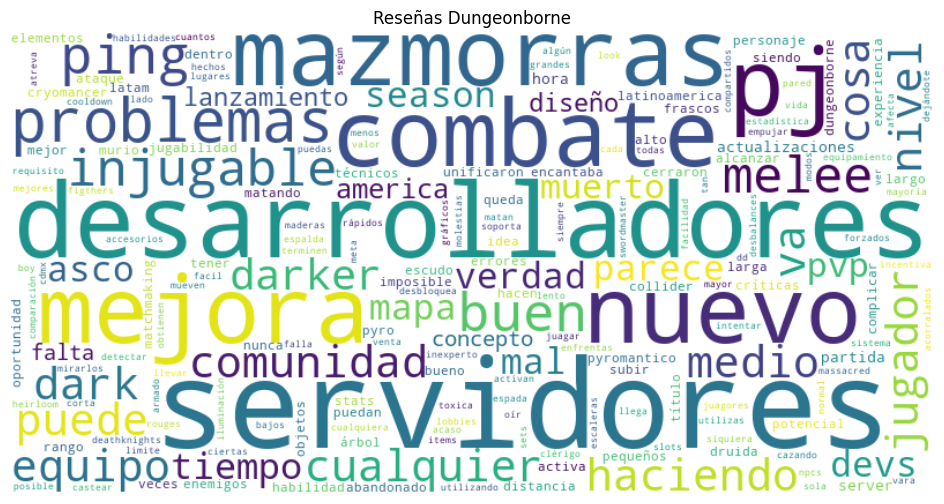

In [18]:
#Ordenar el DataFrame por la columna 'Fecha de Reseña'
df = df.sort_values(by= 'Fecha de Reseña')

#Definir la fecha desde la cual se quieren filtrar las reseñas
desde = pd.to_datetime("2024-10-01")

#Filtrar las reseñas que sean posteriores o iguales a la fecha definida
reseñas_desde = df[df["Fecha de Reseña"] >= desde]

#Definir el conjunto de palabras vacías (stopwords) en español
stop_words = set(stopwords.words('spanish'))

#Agregar algunas palabras adicionales que queremos que sean ignoradas en el análisis
stop_words.update(["juego", "jugadores", "si", "mas", "clase", "solo", "clases"])

#Unir todas las reseñas en una sola cadena de texto
texto = " ".join(reseñas_desde['Reseña'])

#Preprocesamiento del texto:
#Convertir todo el texto a minúsculas para uniformizar
texto = texto.lower()

# Eliminar todos los números del texto
texto = re.sub(r'\d+', '', texto)

# Eliminar los signos de puntuación y caracteres especiales (dejando solo letras y espacios)
texto = re.sub(r'[^\w\s]', '', texto)

#Filtrar las palabras, eliminando las stopwords
palabras = [word for word in texto.split() if word not in stop_words]

#Generar la nube de palabras (Wordcloud) usando las palabras filtradas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(palabras))

#Mostrar la nube de palabras en una figura de tamaño 12x6
plt.figure(figsize=(12, 6))

#Mostrar la imagen de la nube de palabras con interpolación bilineal
plt.imshow(wordcloud, interpolation='bilinear')

#Eliminar los ejes de la gráfica
plt.axis("off")

#Título para la nube de palabras
plt.title("Reseñas Dungeonborne")

#Mostrar la nube de palabras en pantalla
plt.show()

De este stopwords podemos ver que el juego se trata de combates y mazmorras, tambien se nota que los jugadores hablan mucho sobre los desarrolladores, junto con palabras como injugable, servidores, problemas, ping, por lo que podemos inferir de las palabras mas comunes que el juego se volvio dificil de jugar (injugable) debido a alguna decisión que pudieron tomar los desarrolladores en cuanto al juego y en cuanto a los servidores.

Notar que este stopword se ha enfocado en los últimos 6 meses de juego que tuvo el juego, debido a que fue dado de alta luego de las quejas y otros factores, por lo que tiene sentido que las reseñas sean mayormente negativas

A continuación haremos un stopword para el tiempo anterior de estos 6 meses para visualizar si las reseñas son diferentes en un stopword

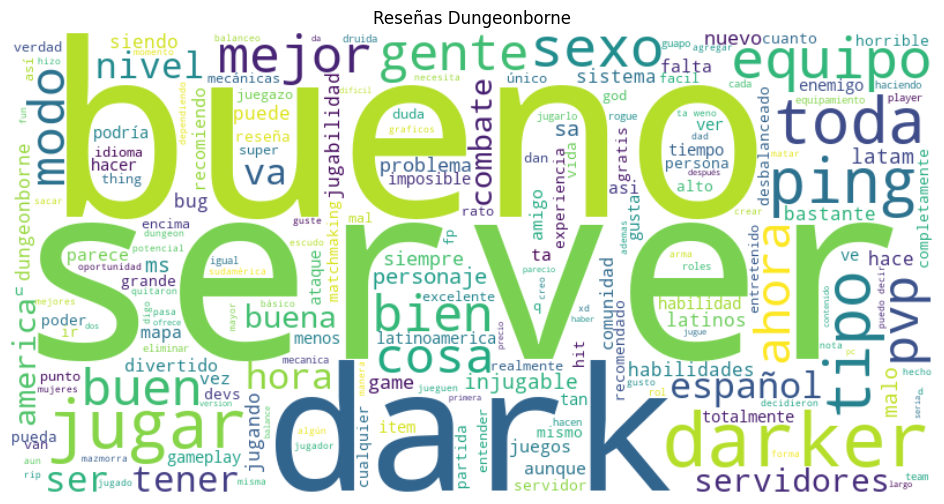

In [20]:
#Ordenar el DataFrame por la columna 'Fecha de Reseña'
df = df.sort_values(by= 'Fecha de Reseña')

#Definir la fecha desde la cual se quieren filtrar las reseñas
desde = pd.to_datetime("2024-10-01")

#Filtrar las reseñas que sean posteriores o iguales a la fecha definida
reseñas_desde = df[df["Fecha de Reseña"] <= desde]

#Definir el conjunto de palabras vacías (stopwords) en español
stop_words = set(stopwords.words('spanish'))

#Agregar algunas palabras adicionales que queremos que sean ignoradas en el análisis
stop_words.update(["juego", "jugadores", "si", "mas", "clase", "solo", "clases"])

#Unir todas las reseñas en una sola cadena de texto
texto = " ".join(reseñas_desde['Reseña'])

#Preprocesamiento del texto:
#Convertir todo el texto a minúsculas para uniformizar
texto = texto.lower()

# Eliminar todos los números del texto
texto = re.sub(r'\d+', '', texto)

# Eliminar los signos de puntuación y caracteres especiales (dejando solo letras y espacios)
texto = re.sub(r'[^\w\s]', '', texto)

#Filtrar las palabras, eliminando las stopwords
palabras = [word for word in texto.split() if word not in stop_words]

#Generar la nube de palabras (Wordcloud) usando las palabras filtradas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(palabras))

#Mostrar la nube de palabras en una figura de tamaño 12x6
plt.figure(figsize=(12, 6))

#Mostrar la imagen de la nube de palabras con interpolación bilineal
plt.imshow(wordcloud, interpolation='bilinear')

#Eliminar los ejes de la gráfica
plt.axis("off")

#Título para la nube de palabras
plt.title("Reseñas Dungeonborne")

#Mostrar la nube de palabras en pantalla
plt.show()

Podemos ver que efectivamente el juego parece ser bastante bueno ya que resaltan palabras como bueno, server, equipo, bien, buen, jugar, tambien podemos ver dark y darker como palabras que hacen alusión a un juego del mismo estilo que es bastante exitoso hasta el dia de hoy, por lo tanto podemos concluir que cuando salio el juego hasta previo los últimos 6 meses en que estuvo disponible las reseñas de la gente eran positivas y nadie hablaba siquiera de los desarrolladores.